# FBREF Web-scraping functions - clustering

In [11]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import klib as kb
import seaborn as sb
import matplotlib.pyplot as plt
import wes
import matplotlib as mpl
import warnings
import numpy as np
from math import pi
import sys
import re
import os
import wes
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [2]:
sys.path.append(os.path.abspath(os.pardir))

from src.fbref_analysis_functions import *

In [36]:
warnings.filterwarnings("ignore")

In [260]:
page =requests.get("https://fbref.com/en/squads/b8fd03ef/2020-2021/Manchester-City-Stats")

In [261]:
soup = BeautifulSoup(page.content, 'html.parser')

In [262]:
remove_content = ["'", "[","]", ",", "%"]

player = []
touches = []
def_pen = []
def_third = []
mid_third = []
att_third = []
att_pen = []
clean_player = []
clean_touches = []

In [263]:
for row in soup.findAll('table')[9].tbody.findAll('tr'):
    first_column = row.findAll('th')[0].contents
    player.append(first_column)

for row in soup.findAll('table')[9].tbody.findAll('tr'):
    first_column = row.findAll('td')[4].contents
    touches.append(first_column)
    
for row in soup.findAll('table')[9].tbody.findAll('tr'):
    first_column = row.findAll('td')[5].contents
    def_pen.append(first_column)
    
for row in soup.findAll('table')[9].tbody.findAll('tr'):
    first_column = row.findAll('td')[6].contents
    def_third.append(first_column)
    
for row in soup.findAll('table')[9].tbody.findAll('tr'):
    first_column = row.findAll('td')[7].contents
    mid_third.append(first_column)
    
for row in soup.findAll('table')[9].tbody.findAll('tr'):
    first_column = row.findAll('td')[8].contents
    att_third.append(first_column)  

for row in soup.findAll('table')[9].tbody.findAll('tr'):
    first_column = row.findAll('td')[9].contents
    att_pen.append(first_column) 

for x in player:
    y = str(x[0])
    y_1 = y.split('>')
    y_2 = y_1[1].split('<')
    y_3 = y_2[0]
    clean_player.append(y_3)
    
touches = str(touches)
def_pen = str(def_pen)
def_third = str(def_third)
mid_third = str(mid_third)
att_third = str(att_third)
att_pen = str(att_pen)


for content in remove_content:
    touches
    touches = touches.replace(content, '')
    
for content in remove_content:
    def_pen
    def_pen = def_pen.replace(content, '')

for content in remove_content:
    def_third
    def_third = def_third.replace(content, '')
    
for content in remove_content:
    mid_third
    mid_third = mid_third.replace(content, '')
    
for content in remove_content:
    att_third
    att_third = att_third.replace(content, '')
    
for content in remove_content:
    att_pen
    att_pen = att_pen.replace(content, '')
    
touches = touches.split(" ")
def_pen = def_pen.split(" ")
def_third = def_third.split(" ")
mid_third = mid_third.split(" ")
att_third = att_third.split(" ")
att_pen = att_pen.split(" ")

touches = pd.to_numeric(touches)
def_pen = pd.to_numeric(def_pen)
def_third = pd.to_numeric(def_third)
mid_third = pd.to_numeric(mid_third)
att_third = pd.to_numeric(att_third)
att_pen = pd.to_numeric(att_pen)

df_possesion = pd.DataFrame()
df_possesion['Player'] = clean_player
df_possesion['Touches'] = touches
df_possesion['Defensive Pen Touches'] = def_pen
df_possesion['Defensive Third Touches'] = def_third
df_possesion['Midfield Touches'] = mid_third
df_possesion['Attacking Third Touches'] = att_third
df_possesion['Offensive Pen Touches'] = att_pen
df_possesion = kb.clean_column_names(df_possesion)

In [264]:
df_possesion

,player,touches,defensive_pen_touches,defensive_third_touches,midfield_touches,attacking_third_touches,offensive_pen_touches
0,Ederson,1149,1003,1145,4,0,0
1,Rúben Dias,2921,285,1195,1891,71,28
2,Rodri,3023,114,635,1985,561,52
3,Raheem Sterling,1478,4,79,606,890,240
4,João Cancelo,2402,78,475,1227,849,80
5,Bernardo Silva,1618,16,209,815,763,101
6,İlkay Gündoğan,1908,26,237,1091,728,92
7,Kevin De Bruyne,1683,13,136,773,916,108
8,Riyad Mahrez,1332,6,69,486,876,156
9,Gabriel Jesus,1031,9,59,436,601,151


In [265]:
df_possesion_piv = pd.DataFrame()
df_possesion_piv['Position'] = ['Defensive Pen Touches', 'Defensive Third Touches', 'Midfield Touches', 'Attacking Third Touches', 'Offensive Pen Touches']
df_possesion_piv['Touches'] = [df_possesion.defensive_pen_touches.sum(), df_possesion.defensive_third_touches.sum(), 
                              df_possesion.midfield_touches.sum(), df_possesion.attacking_third_touches.sum(),
                              df_possesion.offensive_pen_touches.sum()]

In [266]:
df_possesion_piv = pd.DataFrame()
df_possesion_piv['Touches'] = ['Touches']
df_possesion_piv['defensive_pen_touches'] = df_possesion.defensive_pen_touches.sum()
df_possesion_piv['defensive_third_touches'] = df_possesion.defensive_third_touches.sum()
df_possesion_piv['midfield_touches'] = df_possesion.midfield_touches.sum()
df_possesion_piv['attacking_third_touches'] = df_possesion.attacking_third_touches.sum()
df_possesion_piv['offensive_pen_touches'] = df_possesion.offensive_pen_touches.sum()

In [267]:
df_possesion_piv

,Touches,defensive_pen_touches,defensive_third_touches,midfield_touches,attacking_third_touches,offensive_pen_touches
0,Touches,2142,7108,16433,9082,1360


In [268]:
df_possesion_piv = df_possesion_piv[['defensive_pen_touches', 'defensive_third_touches', 'midfield_touches',
                    'attacking_third_touches', 'offensive_pen_touches']]

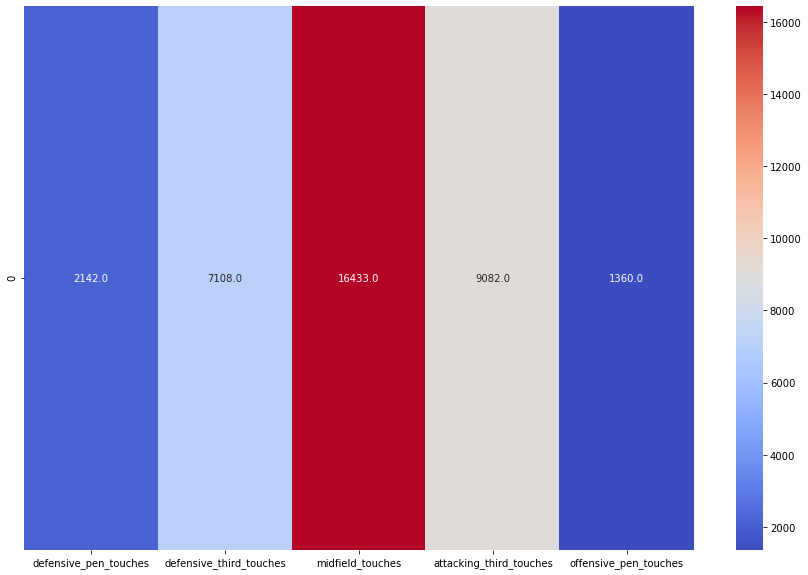

In [269]:
plt.figure(figsize=(15,10))
sb.heatmap(df_possesion_piv, cmap='coolwarm', annot=True, fmt=".1f")

In [270]:
df_possesion_2 = df_possesion[['player','defensive_pen_touches', 'defensive_third_touches', 'midfield_touches',
                    'attacking_third_touches', 'offensive_pen_touches']]

In [271]:
df_possesion_2.set_index('player', inplace=True)

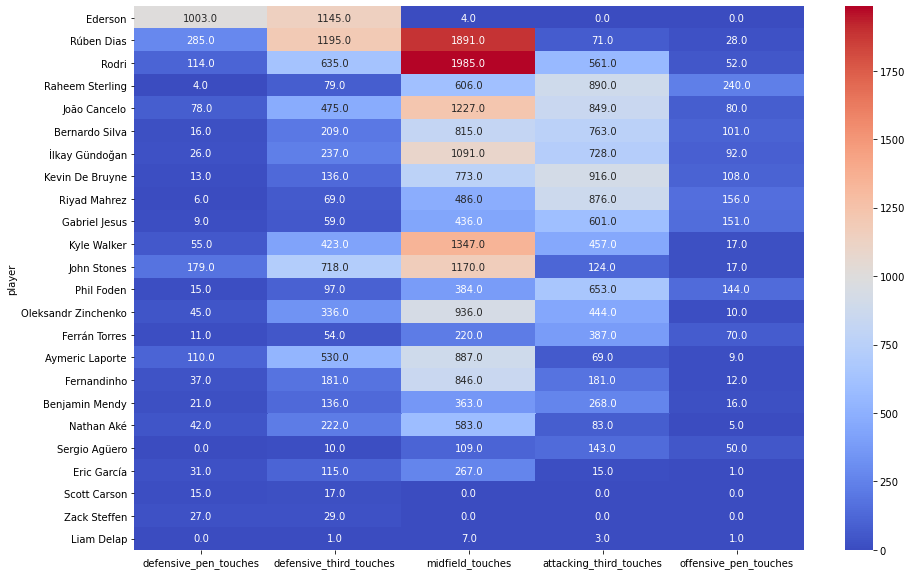

In [272]:
plt.figure(figsize=(15,10))
sb.heatmap(df_possesion_2, cmap='coolwarm', annot=True, fmt=".1f")